In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [19]:
from tensorflow.keras.datasets import imdb
#or
#df = pd.read_csv("IMDB.csv")

In [20]:
#loading data
from tensorflow.keras.preprocessing.sequence import pad_sequences
(X_train, y_train),(X_test,y_test)= imdb.load_data(num_words = 10000)

In [21]:
#preprocess data
X_train = pad_sequences(X_train, maxlen = 200)
X_test = pad_sequences(X_test, maxlen = 200)

In [22]:
#building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

num_words = 10000
max_len = 200

model = Sequential([
    Embedding(num_words, 32, input_length = max_len),
    Flatten(), #basically used to convert multi D into 1D
    Dense(32,activation ='relu', name = 'hidden_layer_2'),
    Dense(16,activation ='relu', name = 'hidden_layer_3'),
    Dense(1,name='Output_layer')

  ])

In [24]:
#pip install pydot
#tf.keras.utils.plot_model(model, show_shapes=True)

In [25]:
 model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [27]:
 history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 20, verbose = 1, batch_size = 512 )
    
 

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5004 - loss: 1.3017 - val_accuracy: 0.5657 - val_loss: 0.6791
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6558 - loss: 0.6414 - val_accuracy: 0.7289 - val_loss: 0.5997
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8088 - loss: 0.5232 - val_accuracy: 0.8077 - val_loss: 0.4523
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8881 - loss: 0.3156 - val_accuracy: 0.8409 - val_loss: 0.5167
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9197 - loss: 0.2376 - val_accuracy: 0.8765 - val_loss: 0.3809
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9616 - loss: 0.1273 - val_accuracy: 0.8767 - val_loss: 0.4752
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9814 - loss: 0.0781 - val_accuracy: 0.8743 - val_loss: 0.5363
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9875 - loss: 0.0638 - val_accuracy: 0.8633 - v

In [28]:
#Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test Accuracy: ",accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8571 - loss: 0.8942
Test loss: 0.8937103152275085
Test Accuracy:  0.858680009841919


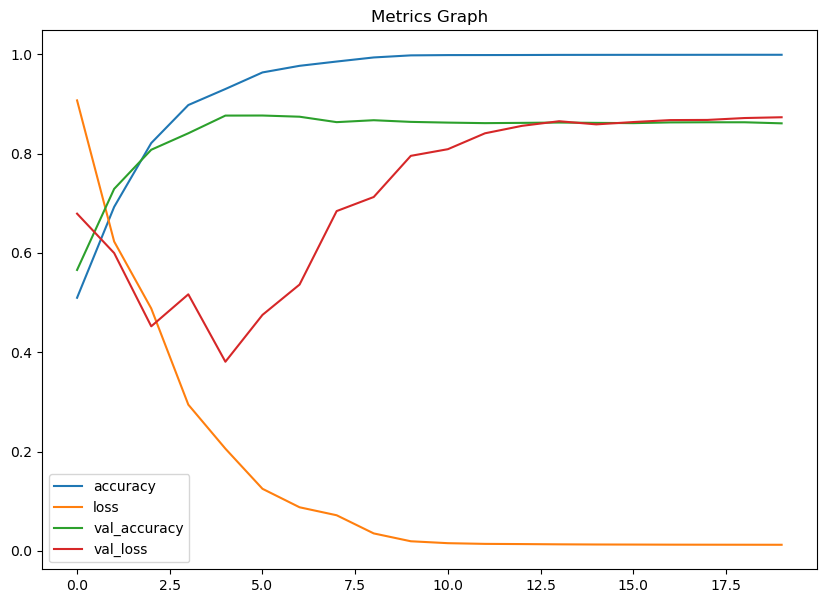

In [29]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [31]:
# Assuming `new_data` is a list containing new reviews
new_data = [
    "Terrible movie. I regret wasting my time watching it."
]

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=200)
# Tokenize and pad sequences for new data
new_sequences = tokenizer.texts_to_sequences(new_data)
new_sequences = pad_sequences(new_sequences, maxlen=200)

# Use the trained model to predict sentiment
predictions = model.predict(new_sequences)

# Decode predictions
labels = ['Negative', 'Positive']
for i, prediction in enumerate(predictions):
    label = labels[prediction.argmax()]
    print(f"Review: {new_data[i]}")
    print(f"Predicted sentiment: {label}")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Review: Terrible movie. I regret wasting my time watching it.
Predicted sentiment: Negative

